### PBMC scQuint Differential Splicing

In [1]:
##Differential intron splicing analysis using scQuint. Scripts by Gonzalo Benegas and Derek Bogdanoff

In [2]:
!date

Mon Jan 16 19:23:20 PST 2023


In [3]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/squint_2


In [4]:
#analysis approach from:
#https://github.com/songlab-cal/scquint/blob/main/differential_splicing_example.ipynb

In [5]:
import anndata

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from scquint.differential_splicing import run_differential_splicing
from scquint.data import calculate_PSI

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from scquint.data import calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca

In [8]:
input_dir = output_dir= '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [9]:
adata_spl = sc.read_h5ad(input_dir+'5prime_spl_3prime_splice_acceptor.h5ad')

In [10]:
groupby = "ct1"
adata_spl.obs[groupby].value_counts()

cM        6218
T4        5339
T8        3186
B         2007
NK        1654
ncM       1162
Tgd        527
cDC        258
PB         186
Progen      91
pDC         45
Name: ct1, dtype: int64

In [11]:
groups_test = adata_spl.obs[groupby].value_counts()[:14].index.values.astype(str).tolist()[:9]

In [12]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [13]:
%%time


diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata_spl, 
    groupby, 
    groups=groups_test,
    subset_to_groups=True,
    min_cells_per_intron_group=50, 
    min_total_cells_per_intron=50, 
    n_jobs=-1,
)

cM
sample sizes:  6218 14319
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 2054)
Number of intron groups:  961
Number of introns:  2054


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 961/961 [01:46<00:00,  9.00it/s]


T4
sample sizes:  5339 15198
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1983)
Number of intron groups:  927
Number of introns:  1983


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 927/927 [00:06<00:00, 147.77it/s]


T8
sample sizes:  3186 17351
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1729)
Number of intron groups:  802
Number of introns:  1729


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 802/802 [00:05<00:00, 141.00it/s]


B
sample sizes:  2007 18530
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1222)
Number of intron groups:  563
Number of introns:  1222


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 563/563 [00:04<00:00, 133.04it/s]


NK
sample sizes:  1654 18883
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1304)
Number of intron groups:  597
Number of introns:  1304


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 597/597 [00:04<00:00, 125.99it/s]


ncM
sample sizes:  1162 19375
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1565)
Number of intron groups:  725
Number of introns:  1565


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 725/725 [00:05<00:00, 127.10it/s]


Tgd
sample sizes:  527 20010
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 627)
Number of intron groups:  282
Number of introns:  627


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:02<00:00, 97.56it/s]


cDC
sample sizes:  258 20279
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 809)
Number of intron groups:  365
Number of introns:  809


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:03<00:00, 100.88it/s]


PB
sample sizes:  186 20351
(20537, 2169)
filter_min_cells_per_feature
filter_singletons
(20537, 2169)
filter_min_global_proportion
filter_singletons
(20537, 2169)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 730)
Number of intron groups:  332
Number of introns:  730


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 332/332 [00:02<00:00, 165.37it/s]


CPU times: user 42.6 s, sys: 9.12 s, total: 51.7 s
Wall time: 3min 17s


In [14]:
diff_spl_intron_groups.to_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_intron_groups_5prime')

In [15]:
diff_spl_introns.to_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_introns_5prime')

In [15]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05 and max_abs_delta_psi > 0.05')

sig_diff_spl_intron_groups.shape

(695, 12)

In [16]:
sig_diff_spl_intron_groups.gene_name.nunique()

317

In [17]:
diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)].shape

(4207, 22)

Text(0.5, 1.0, 'cell counts per celltype')

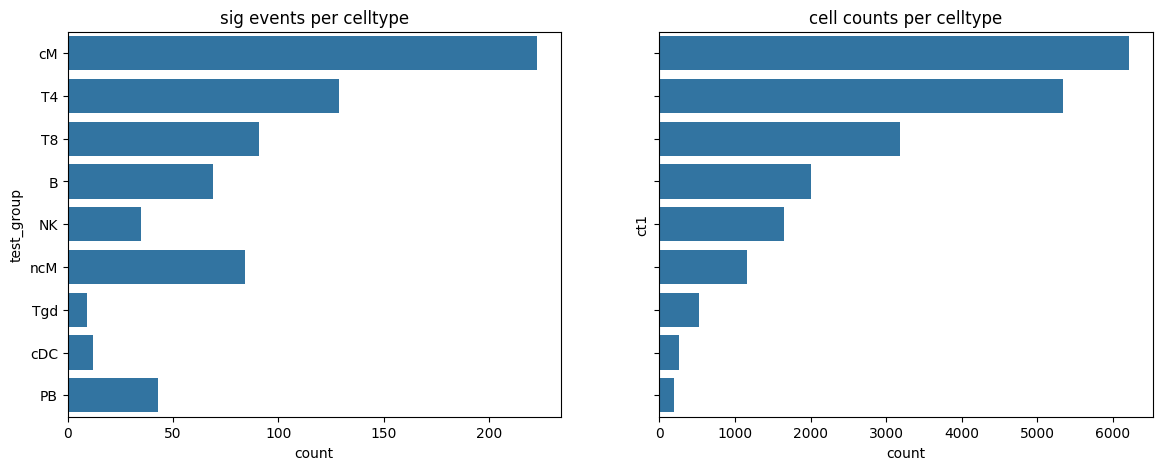

In [18]:
# Number of significant events per cell type
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


sns.countplot(sig_diff_spl_intron_groups, y="test_group", color="C0", order=groups_test, ax=axes[0])
axes[0].set_title('sig events per celltype')

sns.countplot(adata_spl.obs, y='ct1', color="C0", order=groups_test, ax=axes[1])
axes[1].set_title('cell counts per celltype')

In [19]:
adata_spl.layers["PSI_raw"] = calculate_PSI(adata_spl)


/c4/home/derek/bin/scquint/scquint/data.py:203: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [20]:
adata_spl

AnnData object with n_obs × n_vars = 20673 × 2169
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'chromosome', 'start', 'end', 'st

In [21]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [22]:
marker_introns = find_marker_introns(
    sig_diff_spl_intron_groups, diff_spl_introns, 10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'cM': ['DOCK8_chr9:271730-286460',
  'SH3KBP1_chrX:19746442-19836124',
  'FOXP1_chr3:71299881-71359149',
  'TSPAN4_chr11:844187-847200',
  'CCND3_chr6:41940586-41941451',
  'CMC1_chr3:28263381-28316332',
  'NCOA4_chr10:46016695-46023329',
  'PAFAH1B3_chr19:42302326-42302698',
  'TRG-AS1_chr7:38350451-38375556',
  'TMEM170A_chr16:75451840-75464467'],
 'T4': ['LIMS1_chr2:108621462-108659604',
  'RNH1_chr11:502250-507112',
  'FAM200B_chr4:15681785-15686235',
  'CYLD_chr16:50742217-50742761',
  'PCGF5_chr10:91163082-91222688',
  'SET_chr9:128689656-128691169',
  'SMAP2_chr1:40374224-40406735',
  'ARID5B_chr10:62049484-62050887',
  'RASSF1_chr3:50332155-50337172',
  'DGKA_chr12:55931345-55936422'],
 'T8': ['FGR_chr1:27625152-27626459'],
 'B': ['PTPRC_chr1:198702531-198703297',
  'ARHGAP15_chr2:143228669-143250510',
  'TANK_chr2:161137064-161179613'],
 'NK': ['FYB1_chr5:39202988-39270568', 'AC092821.3_chr12:9645394-9653682'],
 'ncM': ['WARS_chr14:100369259-100375282', 'WIPF1_chr2:174585612-

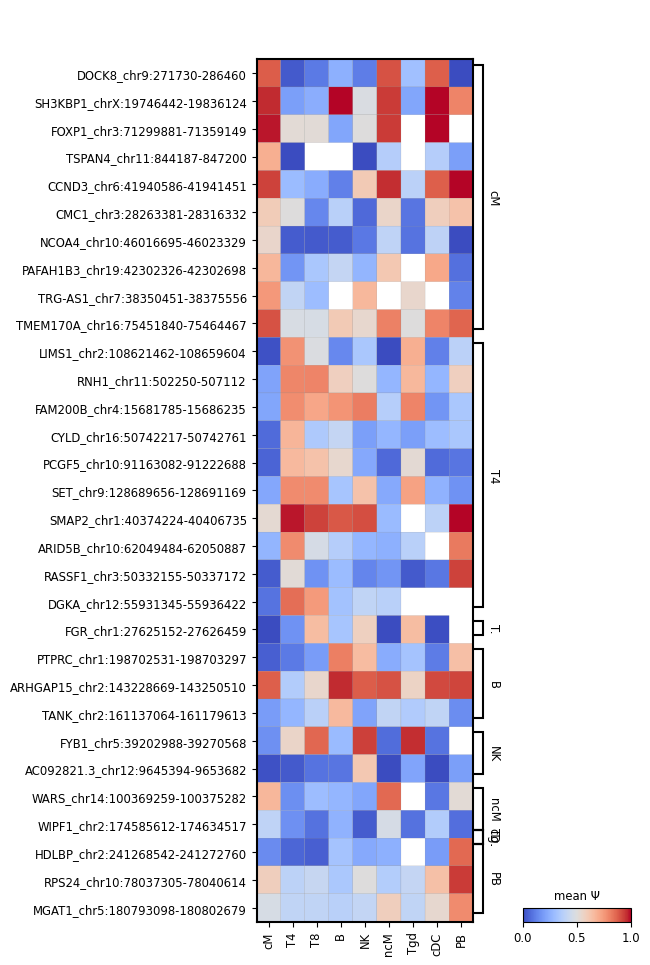

In [23]:
sc.pl.matrixplot(
    mask_PSI(adata_spl[adata_spl.obs[groupby].isin(groups_test)], 
             marker_introns, 
             groupby, min_cells=5),
    marker_introns,
    groupby, 
    cmap='coolwarm',
    categories_order=groups_test,
    swap_axes=True,
    layer="PSI_raw_masked", 
    colorbar_title="mean Ψ",
    vmin=0, vmax=1,
    dendrogram=False,
)


In [24]:
sum(find_marker_introns(diff_spl_intron_groups, diff_spl_introns, 3, min_delta_psi=0.5).values(), [])

['FYB1_chr5:39202988-39270568',
 'AC092821.3_chr12:9645394-9653682',
 'HDLBP_chr2:241268542-241272760',
 'LIMS1_chr2:108621462-108659604',
 'RNH1_chr11:502250-507112',
 'PTPRC_chr1:198702531-198703297',
 'DOCK8_chr9:271730-286460',
 'SH3KBP1_chrX:19746442-19836124',
 'FGR_chr1:27625152-27626459']

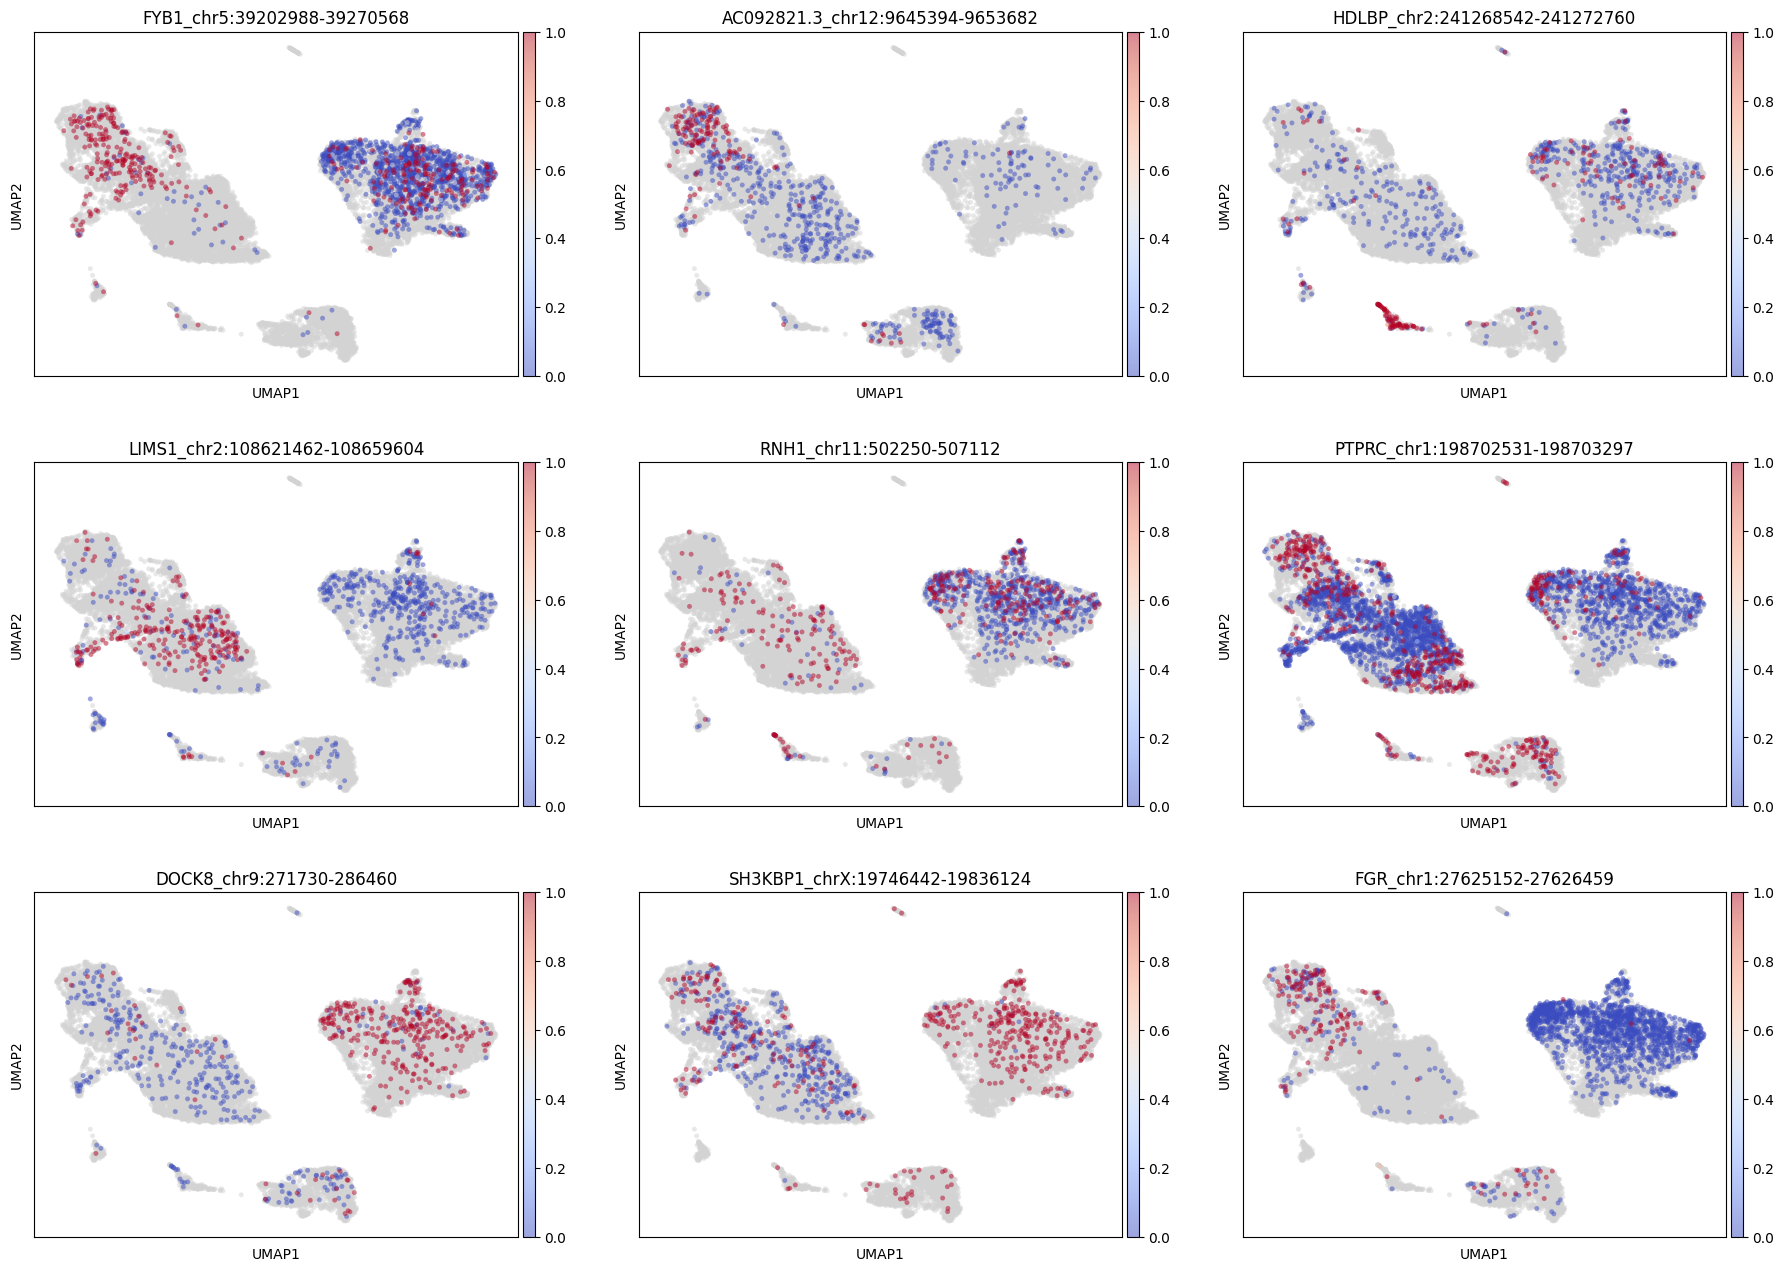

In [25]:
sc.pl.umap(
    adata_spl,
    color=sum(find_marker_introns(diff_spl_intron_groups, diff_spl_introns, 3, min_delta_psi=0.5).values(), []), 
    cmap='coolwarm',
    layer="PSI_raw", vmin=0, vmax=1, ncols=3, size=50, alpha=0.5,
)


In [26]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [27]:
temp = diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)]

In [28]:
genedf = sc.get.obs_df(
        adata_spl[adata_spl.obs['ct1'].isin(groups_test)],
        layer = 'PSI_raw',
        keys=["ct1", *temp[temp['delta_psi'] > .20]['name'].tolist()]
    )
grouped = genedf.groupby("ct1")
mean, var = grouped.mean(), grouped.var()

In [29]:
mean.shape

(9, 177)

In [30]:
##remove offending gene
mean = mean.loc[:, ~mean.columns.str.startswith('AC092821.3')]

In [31]:
mean.shape

(9, 175)

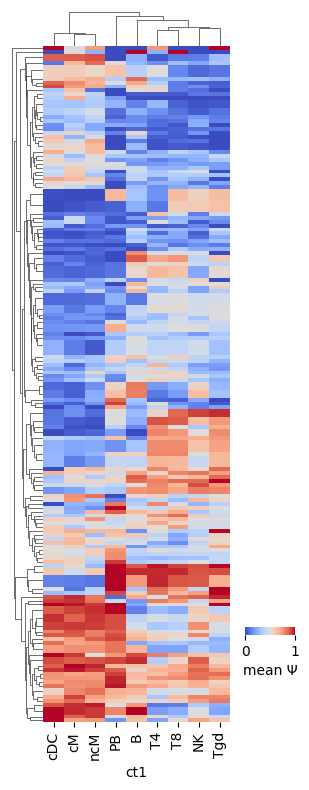

In [32]:
h = sns.clustermap(mean.fillna(0).T,
               cmap="coolwarm",
               figsize=(2.5,8),
               yticklabels=False,
               metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
               dendrogram_ratio=(.15,.05),
               cbar_pos=(1, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean Ψ'}

              )



In [33]:
mean

,PTPRC_chr1:198692374-198699563,ZNF487_chr10:43437263-43454064,NCOA4_chr10:46016695-46023329,PCGF5_chr10:91220837-91222688,RNH1_chr11:502250-504426,TSPAN4_chr11:844187-847200,RNF41_chr12:56216614-56221759,MAPKAPK5-AS1_chr12:111840478-111841683,TAOK3_chr12:118266760-118372647,GMPR2_chr14:24232978-24233218,...,RPS24_chr10:78037305-78040614,VPS29_chr12:110496204-110499534,ERP29_chr12:112019895-112022149,METTL5_chr2:169824641-169824781,HDLBP_chr2:241268542-241272760,SNU13_chr22:41680365-41688793,MRPL22_chr5:154950939-154956370,MGAT1_chr5:180793098-180802679,DECR1_chr8:90017327-90018908,SET_chr9:128684008-128691169
ct1,,,,,,,,,,,,,,,,,,,,,
B,0.176471,0.521739,0.037037,0.460000,0.210526,0.000000,0.226190,0.166667,0.634146,0.851852,...,0.336692,0.401961,0.659664,0.302817,0.318182,0.650926,0.593750,0.375000,0.750000,0.673077
NK,0.423462,0.083333,0.105263,0.770492,0.250000,0.000000,0.280000,0.375000,0.812500,0.304348,...,0.501412,0.466165,0.836134,0.388889,0.233333,0.846939,0.700000,0.409091,0.680000,0.367257
PB,0.440000,0.000000,0.000000,0.903226,0.240741,0.200000,0.833333,0.666667,0.666667,0.363636,...,0.937911,0.759111,0.932432,0.586667,0.857384,0.971277,0.972222,0.784314,0.982759,0.835486
T4,0.813643,0.558824,0.036458,0.336589,0.080000,0.000000,0.317073,0.519481,0.626050,0.292929,...,0.387788,0.512937,0.641540,0.418763,0.060109,0.763555,0.648936,0.400000,0.705789,0.216296
T8,0.755753,0.117647,0.032787,0.369565,0.025000,0.000000,0.333333,0.357143,0.705882,0.282051,...,0.419556,0.444206,0.744505,0.442857,0.043478,0.784038,0.596774,0.400000,0.627193,0.215152
Tgd,0.718750,0.000000,0.090909,0.473684,0.000000,0.000000,0.285714,1.000000,0.666667,0.250000,...,0.411633,0.500000,0.847458,0.266667,0.000000,0.772727,0.571429,0.400000,0.617647,0.270833
cDC,0.932203,0.333333,0.390625,0.925926,0.163636,0.363636,0.846154,0.600000,0.875000,0.583333,...,0.639241,0.511299,0.769231,0.403846,0.192308,0.750000,0.719298,0.537037,0.833333,0.741935
cM,0.949649,0.632812,0.550532,0.943925,0.376992,0.692308,0.716495,0.701613,1.000000,0.653179,...,0.584179,0.466952,0.721772,0.368512,0.150362,0.756737,0.782895,0.475410,0.767574,0.773930
ncM,0.838964,0.090909,0.395349,0.931548,0.229494,0.365385,0.750000,0.666667,0.972222,0.700000,...,0.359964,0.591540,0.737089,0.327586,0.252941,0.752193,0.787500,0.583333,0.790441,0.769531


### plot gene expression for relevant genes

In [148]:
adata_exp = anndata.read_h5ad("/c4/home/derek/data1/derek/data_scSLR/PBMC/gene_expression.h5ad")
adata_exp

AnnData object with n_obs × n_vars = 20673 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [171]:
genedf_genes = sc.get.obs_df(
        adata_exp[adata_exp.obs['ct1'].isin(groups_test)],
      #  layer = 'PSI_raw',
        keys=[x for x in ["ct1", *temp[temp['delta_psi'] > .20]['gene_name'].tolist()] if x != 'AC092821.3']
    )
grouped_genes = genedf_genes.groupby("ct1")
mean_genes, var_genes = grouped_genes.mean(), grouped_genes.var()

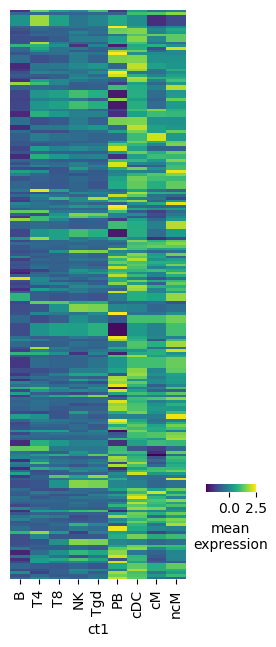

In [190]:
c = sns.clustermap(mean_genes.fillna(0).T,
               cmap="viridis",
               figsize=(2.5,8),
               yticklabels=False,
          #     metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
          #     dendrogram_ratio=(0,0),
               row_linkage=h.dendrogram_row.linkage,
               col_linkage=h.dendrogram_col.linkage,
               cbar_pos=(1.02, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean\nexpression'},
               z_score=0,
            #   standard_scale=1,
                   # vmax=1,
                   # vmin=-1
              )

c.ax_row_dendrogram.set_visible(False)
c.ax_col_dendrogram.set_visible(False)

### sashimi tracks

In [230]:
import os
from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [216]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [217]:
sashimi_introns = diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"]

In [218]:
sashimi_introns.head()

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
306,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.819360,0.642666,0.176694,0.350428,0.176694,0.350428,cM,PTPRC_chr1:198692374-198699563
307,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.180640,0.357334,-0.176694,-0.984158,0.176694,0.984158,cM,PTPRC_chr1:198696910-198699563
308,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.315574,0.272767,0.042806,0.210307,0.042806,0.210307,cM,PTPRC_chr1:198692374-198703297
309,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.506657,0.445208,0.061449,0.186531,0.061449,0.186531,cM,PTPRC_chr1:198699705-198703297
310,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.177769,0.282025,-0.104256,-0.665818,0.104256,0.665818,cM,PTPRC_chr1:198702531-198703297


In [219]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [220]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


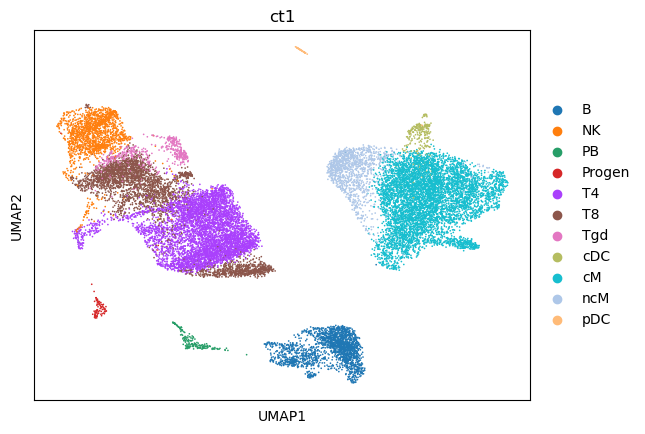

In [222]:
sc.pl.umap(adata_spl,
           color='ct1'
          )

In [223]:
colors = pd.DataFrame(adata_spl.uns['ct1_colors'],
             index=adata_spl.obs['ct1'].cat.categories,
             columns=['color']
        
            )

In [224]:
link_files[1:-2]

['T4', 'T8', 'B', 'NK', 'ncM', 'Tgd']

In [226]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files[1:-2]:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
# Path to bigwig file
bw_file = {bw_path}/{name}.bw
# Path to links file
height = 10
bw_color = {colors.loc[name]['color']}
number_of_bins = 1000
# max_value = 12
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name]['color']}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
scale_link_height = 2
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 3
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))


    


In [227]:
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
              )

In [228]:
genes[genes['Gene name'] == 'PTPRC']

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
1900,PTPRC,CHR_HSCHR1_3_CTG31,198650158,198733963
68345,PTPRC,1,198638457,198757476


In [1]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --region 'chr1:198638457-198757476' -o ./sashimi_plots/sashimi_PTPRC.png


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 3152.43it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 4452.55it/s]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 604.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.145663022994995
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 29.893617021276597. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file test]
DEBUG:pygenometracks.tracks.GenomeTrack:2 links plotted
INFO:pygenometracks.tracksClass:plotting 3. [sashimi file test]
DEBUG:pygenometr

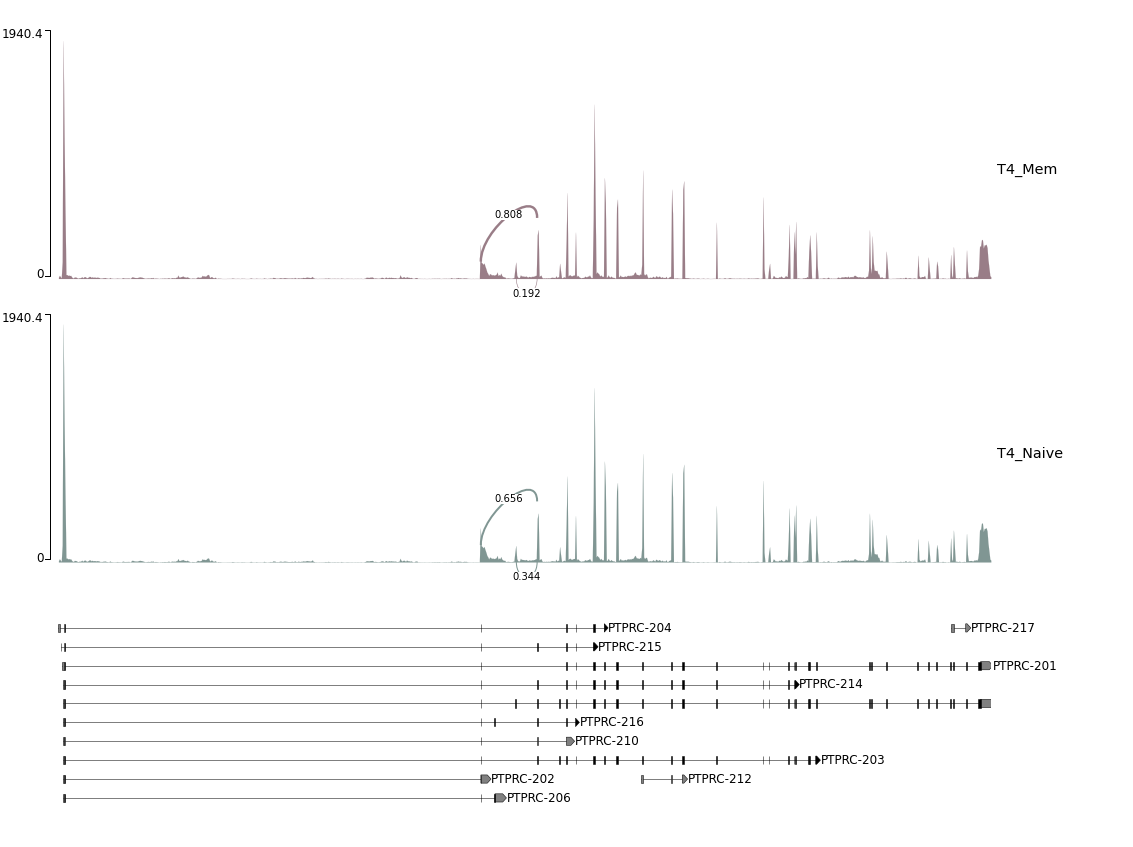

In [3]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_PTPRC.png',retina=False)

In [211]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/scquint:
#
# Name                    Version                   Build  Channel
_ipython_minor_entry_point 8.7.0                hb6b4a82_0    conda-forge
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
alsa-lib                  1.2.8                h166bdaf_0    conda-forge
anndata                   0.8.0              pyhd8ed1ab_1    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appdirs                   1.4.4                    pypi_0    pypi
argcomplete               2.0.0                    pypi_0    pypi
argh                      0.26.2                   pypi_0    pypi
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
asciitree                 0.3.3                    pypi_0    pypi
asttokens    